In [3]:
import os 
import copy

In [ ]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

# bandwidth parameter in the Gaussian kernel function
bw = 6.0

# penalty parameter 
log_pen_param = -12.0

# base density 
base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])

plot_kwargs = plot_IF_1d_params(x_limit=(21., 410.))

In [ ]:
contam_pt = 200.
contam_data = np.array([[contam_pt]])
    
ifun = SMInfluenceFunction(
        data = data_waiting, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)
    
if_vals = ifun.plot_IF_logdensity_1d(
        plot_kwargs = plot_kwargs, 
        x_label = 'waiting')

In [48]:
contam_data_array = np.arange(90., 410., 100)

os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

# bandwidth parameter in the Gaussian kernel function
bw = 5.0
# kernel function used 
kernel_type = 'gaussian_poly2'
# contamnation weight 
contam_weight = 1e-8
# penalty parameter 
log_pen_param = -12.0
# base density 
base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])
plot_kwargs = plot_IF_1d_params(x_limit=(21., 410.))

result = eval_IF_logdensity_contam_data_array(
    data = data_waiting, 
    new_data = np.linspace(plot_kwargs['x_limit'][0], plot_kwargs['x_limit'][1], plot_kwargs['plot_pts_cnt']), 
    contam_data_array = contam_data_array, 
    contam_weight = contam_weight, 
    penalty_param = np.exp(log_pen_param), 
    base_density = base_density,
    r1=1.0, r2=0., c=0., bw=bw, 
    kernel_type=kernel_type,
    save_data=, 
    save_dir=None)# f'bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}')

--------------------------------------------------
Computing the uncontaminated log-density values.
--------------------------------------------------
Computing the contaminated log-density values 
with the current contaminated data point being [90.].
--------------------------------------------------
Computing the contaminated log-density values 
with the current contaminated data point being [190.].
--------------------------------------------------
Computing the contaminated log-density values 
with the current contaminated data point being [290.].
--------------------------------------------------
Computing the contaminated log-density values 
with the current contaminated data point being [390.].


In [49]:
if_all, if_contam = result[0], result[1]

In [50]:
if_contam

{'contam_data': array([[ 90.],
        [190.],
        [290.],
        [390.]]),
 'IF_vals': array([   0.        , 6515.95523842, 6515.95516676, 6515.95516676])}

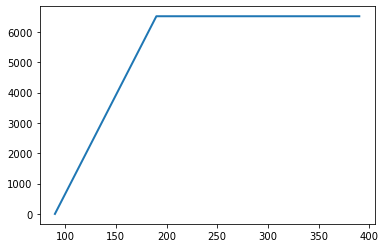

In [51]:
plt.plot(if_contam['contam_data'], if_contam['IF_vals'], color = 'tab:blue', linewidth = 2.0)

In [52]:
if_all['new_data'] = np.linspace(plot_kwargs['x_limit'][0], plot_kwargs['x_limit'][1], plot_kwargs['plot_pts_cnt'])

In [53]:
if_all

{'new_data': array([ 21.       ,  21.1945973,  21.3891946, ..., 409.6108054,
        409.8054027, 410.       ]),
 'contam_data': array([[ 90.],
        [190.],
        [290.],
        [390.]]),
 'contam [90.]': array([0., 0., 0., ..., 0., 0., 0.]),
 'contam [190.]': array([5.762656  , 5.76249302, 5.76230337, ..., 5.76358166, 5.76358166,
        5.76358166]),
 'contam [290.]': array([5.76258434, 5.76242136, 5.76223171, ..., 5.76351   , 5.76351   ,
        5.76351   ]),
 'contam [390.]': array([  5.76258434,   5.76242136,   5.76223171, ..., -20.28267931,
        -17.21852945, -14.47507143])}

In [62]:
# to make the contour plot 
# form the plotting values 
horizontal_contamdata = if_all['contam_data'].flatten()
vertical_newdata = if_all['new_data'].flatten()
plot_vals = []
for i in horizontal_contamdata.reshape(-1, 1): 
    plot_vals.append(if_all[f'contam {i}'])
plot_vals = np.array(plot_vals).T

In [63]:
plot_vals.shape

(2000, 4)

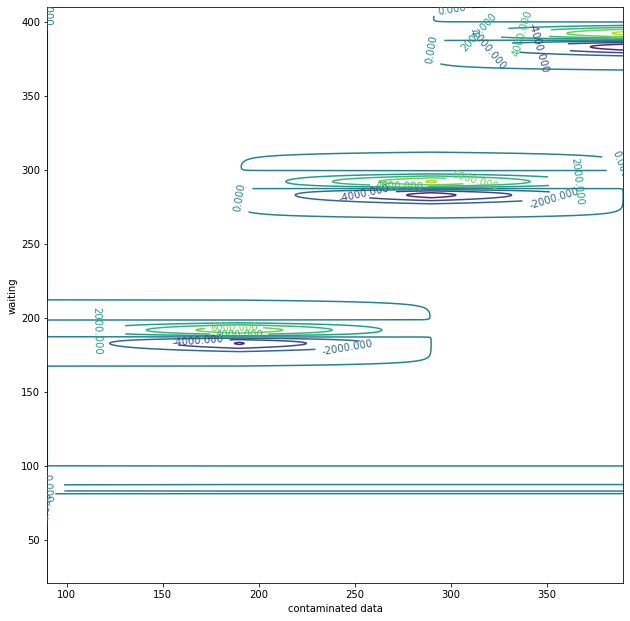

In [65]:
x_label = 'contaminated data'
y_label = 'waiting'
fig = plt.figure(figsize=(10, 10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])

# if plot_kwargs['filled_contour']:
#     cp = plt.contourf(x0_mesh, x1_mesh, plot_val)
#     plt.colorbar(cp)
# else:
cp = ax.contour(horizontal_contamdata, vertical_newdata, plot_vals)
ax.clabel(cp, inline=True, fontsize=10)

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()

In [66]:
m1 = np.random.rand(5).reshape(-1, 1)
m2 = np.random.rand(10).reshape(-1, 2)
m1, m2

(array([[0.87405365],
        [0.81071494],
        [0.05816375],
        [0.5950375 ],
        [0.78604685]]),
 array([[0.1021646 , 0.26070708],
        [0.31209844, 0.36375467],
        [0.78962704, 0.26365721],
        [0.63134929, 0.01741813],
        [0.60818945, 0.08199493]]))

In [67]:
m1 * m2

array([[0.08929734, 0.22787198],
       [0.25302287, 0.29490134],
       [0.04592767, 0.01533529],
       [0.3756765 , 0.01036444],
       [0.4780654 , 0.06445185]])

In [68]:
0.87405365 * 0.1021646, 0.87405365 * 0.26070708

(0.08929734153079, 0.22787197485484198)